# Average winds correlated to FLC index
* using pre-processed data from MODEL_FLC

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import datetime

In [2]:
time = "00z"

root = "/home/jturner/false_low_clouds_2023/Model/Time_Lapse/time_"+time+"/"

Set the lat and lon range for the analysis. This is used within the functions that build the xarrays.

In [3]:
#---Northeast US
#     min_lon = -83 + 360
#     min_lat = 50
#     max_lon = -51 + 360
#     max_lat = 26
    
#---Central America
#     min_lon = -102 + 360
#     min_lat = 23
#     max_lon = -81 + 360
#     max_lat = 5

#---Kuroshio Current
#     min_lon = 114
#     min_lat = 53
#     max_lon = 170
#     max_lat = 16

#---South America
min_lon = -100 + 360
min_lat = -15
max_lon = -40 + 360
max_lat = -58

In [4]:
def wind_u(date):
    
    wind = xr.open_dataset(root+date+'/u_'+date+'.nc')
    
    wind = wind.sel(latitude=slice(max_lat,min_lat), longitude=slice(min_lon,max_lon))
    
    dims = wind.u
    
    #---Building the xarray dataset
    
    row_meshgrid, col_meshgrid = np.meshgrid(dims.latitude, dims.longitude, indexing='ij')

    ds = xr.Dataset(
        data_vars=dict(
            u=(["x","y"], wind.u)
        ),
        coords=dict(
            latitude=(["x","y"], row_meshgrid),
            longitude=(["x","y"], col_meshgrid),
        ),
        attrs=dict(description="U direction winds"),
    )
    
    ds = ds.expand_dims(dim={"time": 1})
    
    return ds

In [5]:
def wind_v(date):
    
    wind = xr.open_dataset(root+date+'/v_'+date+'.nc')
    
    wind = wind.sel(latitude=slice(max_lat,min_lat), longitude=slice(min_lon,max_lon))
    
    dims = wind.v
    
    #---Building the xarray dataset
    
    row_meshgrid, col_meshgrid = np.meshgrid(dims.latitude, dims.longitude, indexing='ij')

    ds = xr.Dataset(
        data_vars=dict(
            v=(["x","y"], wind.v)
        ),
        coords=dict(
            latitude=(["x","y"], row_meshgrid),
            longitude=(["x","y"], col_meshgrid),
        ),
        attrs=dict(description="V direction winds"),
    )
    
    ds = ds.expand_dims(dim={"time": 1})
    
    return ds

In [7]:
wind_3d_u = [wind_u('20230301'), wind_u('20230302'),
                wind_u('20230303'), wind_u('20230304'), 
                wind_u('20230305'), wind_u('20230306'), 
                wind_u('20230307'), wind_u('20230308'), 
                wind_u('20230309'), wind_u('20230310'), 
                wind_u('20230311'), wind_u('20230312'), 
                wind_u('20230313'), wind_u('20230314'), 
                wind_u('20230315'), wind_u('20230316'), 
                wind_u('20230317'), wind_u('20230318'), 
                wind_u('20230319'), wind_u('20230320'), 
                wind_u('20230321'), 
                wind_u('20230322'), wind_u('20230323'), 
                wind_u('20230324'), wind_u('20230325'),
                wind_u('20230326'), wind_u('20230327'),
                wind_u('20230328'), wind_u('20230329'),
                wind_u('20230330'), wind_u('20230331')]

wind_3d_v = [wind_v('20230301'), wind_v('20230302'),
                wind_v('20230303'), wind_v('20230304'), 
                wind_v('20230305'), wind_v('20230306'), 
                wind_v('20230307'), wind_v('20230308'), 
                wind_v('20230309'), wind_v('20230310'), 
                wind_v('20230311'), wind_v('20230312'), 
                wind_v('20230313'), wind_v('20230314'), 
                wind_v('20230315'), wind_v('20230316'), 
                wind_v('20230317'), wind_v('20230318'), 
                wind_v('20230319'), wind_v('20230320'), 
                wind_v('20230321'), 
                wind_v('20230322'), wind_v('20230323'), 
                wind_v('20230324'), wind_v('20230325'),
                wind_v('20230326'), wind_v('20230327'),
                wind_v('20230328'), wind_v('20230329'),
                wind_v('20230330'), wind_v('20230331')]

dates = [datetime.datetime(2023, 3, 1), datetime.datetime(2023, 3, 2),
         datetime.datetime(2023, 3, 3), datetime.datetime(2023, 3, 4),
         datetime.datetime(2023, 3, 5), datetime.datetime(2023, 3, 6),
         datetime.datetime(2023, 3, 7), datetime.datetime(2023, 3, 8),
         datetime.datetime(2023, 3, 9), datetime.datetime(2023, 3, 10),
         datetime.datetime(2023, 3, 11), datetime.datetime(2023, 3, 12),
         datetime.datetime(2023, 3, 13), datetime.datetime(2023, 3, 14),
         datetime.datetime(2023, 3, 15), datetime.datetime(2023, 3, 16),
         datetime.datetime(2023, 3, 17), datetime.datetime(2023, 3, 18),
         datetime.datetime(2023, 3, 19), datetime.datetime(2023, 3, 20),
         datetime.datetime(2023, 3, 21),
        datetime.datetime(2023, 3, 22), datetime.datetime(2023, 3, 23), 
        datetime.datetime(2023, 3, 24), datetime.datetime(2023, 3, 25),
        datetime.datetime(2023, 3, 26), datetime.datetime(2023, 3, 27),
        datetime.datetime(2023, 3, 28), datetime.datetime(2023, 3, 29),
        datetime.datetime(2023, 3, 30), datetime.datetime(2023, 3, 31)]

In [8]:
da_concat_u = xr.concat(wind_3d_u, pd.Index(dates, name='time'))
da_concat_v = xr.concat(wind_3d_v, pd.Index(dates, name='time'))

In [9]:
av_u = da_concat_u.mean(dim='time')
av_v = da_concat_v.mean(dim='time')

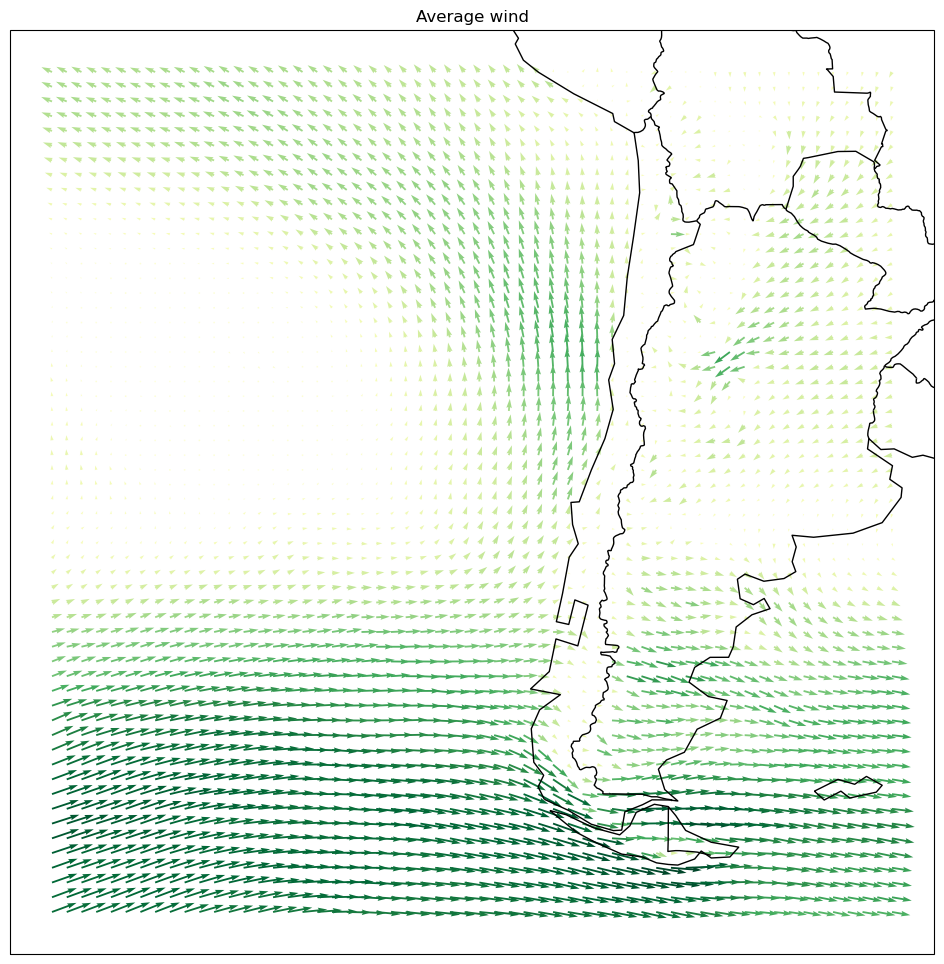

In [10]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})

len_x = av_u['longitude'][0]
len_y = av_u['latitude'].T[0]

X, Y = np.meshgrid(len_x, len_y)
X = X[0:len(len_x):3,0:len(len_y):3]
Y = Y[0:len(len_x):3,0:len(len_y):3]

U = av_u.u[0:len(len_x):3,0:len(len_y):3]
V = av_v.v[0:len(len_x):3,0:len(len_y):3]

EE=np.sqrt(U**2+V**2)

q = ax.quiver(X, Y, U, V, EE, transform=ccrs.PlateCarree(), width=0.002, scale_units='xy', scale=10, cmap='YlGn')

ax.set_title('Average wind')

ax.coastlines(resolution='110m')
ax.add_feature(cfeature.BORDERS)